# Winter School 2024 - Plotting Tutorial

This notebook highlights basic approaches for plotting data.

Authors: Christopher Katins, Mario Sänger, Christopher Lazik, Thomas Kosch
Credits to Patrick Schäfer (HU Berlin)

## Plotting

Essentially there are four ways of plotting data given in pandas DataFrame:
- Matplotlib pyplot
- Matplotlib OO
- Pandas
- Seaborn

First setup environment and install packages

In [1]:
#!python -m venv env_ws_tutorial

In [2]:
#!source env_ws_tutorial/bin/activate

In [3]:
#!pip install -r requirements.txt

Imports + Load the data set

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_json("movie_data.json")
data[["url", "title", "year", "ratingValue", "budget", "gross", "genreList"]]

,url,title,year,ratingValue,budget,gross,genreList
0,/title/tt0111161/,Die Verurteilten,1994,9.3,"$25,000,000 (estimated)",28884504,[Drama]
1,/title/tt0068646/,Der Pate,1972,9.2,"$6,000,000 (estimated)",250341816,"[Crime, Drama]"
2,/title/tt0468569/,The Dark Knight,2008,9.0,"$185,000,000 (estimated)",1006234167,"[Action, Crime, Drama]"
3,/title/tt0071562/,Der Pate 2,1974,9.0,"$13,000,000 (estimated)",47961919,"[Crime, Drama]"
4,/title/tt0050083/,Die zwölf Geschworenen,1957,9.0,"$350,000 (estimated)",955,"[Crime, Drama]"
...,...,...,...,...,...,...,...
245,/title/tt0071411/,"Uzala, der Kirgise",1975,8.2,"$4,000,000 (estimated)",14480,"[Adventure, Biography, Drama]"
246,/title/tt1454029/,The Help,2011,8.1,"$25,000,000 (estimated)",216639112,[Drama]
247,/title/tt0083987/,Gandhi,1982,8.1,"$22,000,000 (estimated)",52767889,"[Biography, Drama]"
248,/title/tt0103639/,Aladdin,1992,8.0,"$28,000,000 (estimated)",504050219,"[Animation, Adventure, Comedy]"


### Matplotlib pyplot

Documentation: [https://matplotlib.org/](https://matplotlib.org/)

General approach:
- Stateful: functions affect the active plot
- plt.figure() creates a new plot
- plt.show() shows it
- Customize the plot with functions like title()

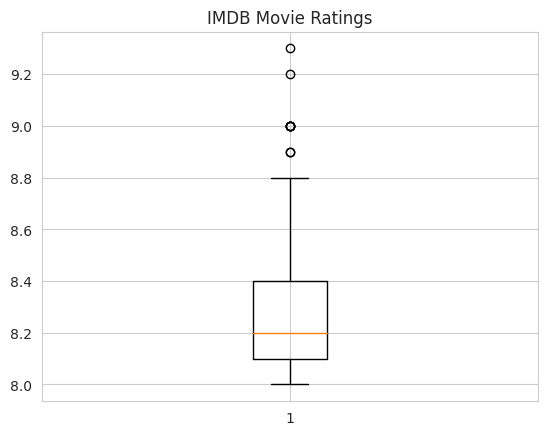

In [5]:
plt.figure()
plt.title("IMDB Movie Ratings")
plt.boxplot(data["ratingValue"])
plt.show()

### Matplotlib pyplot

Documentation: [https://matplotlib.org/](https://matplotlib.org/)

General approach:
- Use the Matplotlib Object Oriented Interface
- subplots() creates a figure and one or more Axis objects
- Call functions on the exact object you want to affect
- Function names are slightly different (e.g. set_title vs title)

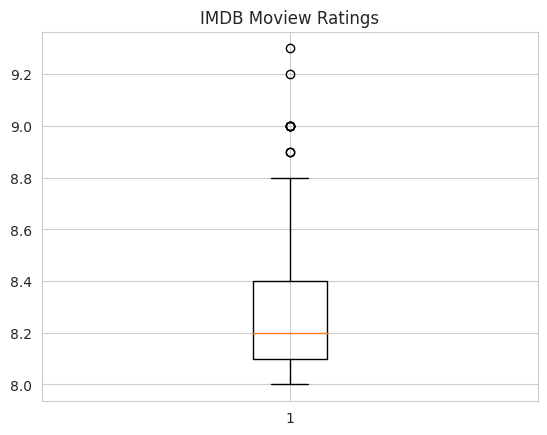

In [6]:
fig, ax = plt.subplots()
ax.set_title("IMDB Moview Ratings")
ax.boxplot(data["ratingValue"])
plt.show()

### Pandas plot

Documentation: [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

General approach:
- Use pandas plotting functionality on DataFrames
- By default, matplotlib is used as backend
- Plotting returns a matplotlib axis object
- kind-parameter: sets the plot type (line plot by default)
- Uses the index as x-axis

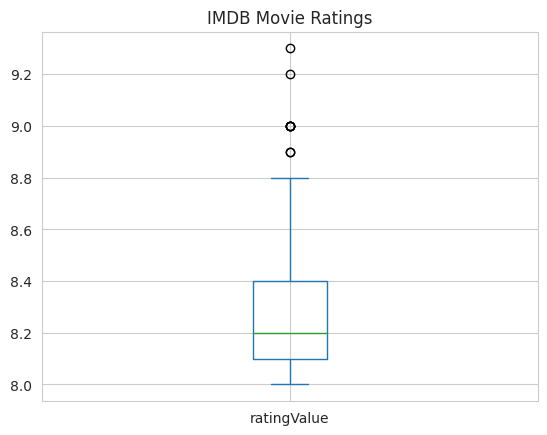

In [7]:
ax = data["ratingValue"].plot(title="IMDB Movie Ratings", kind="box")

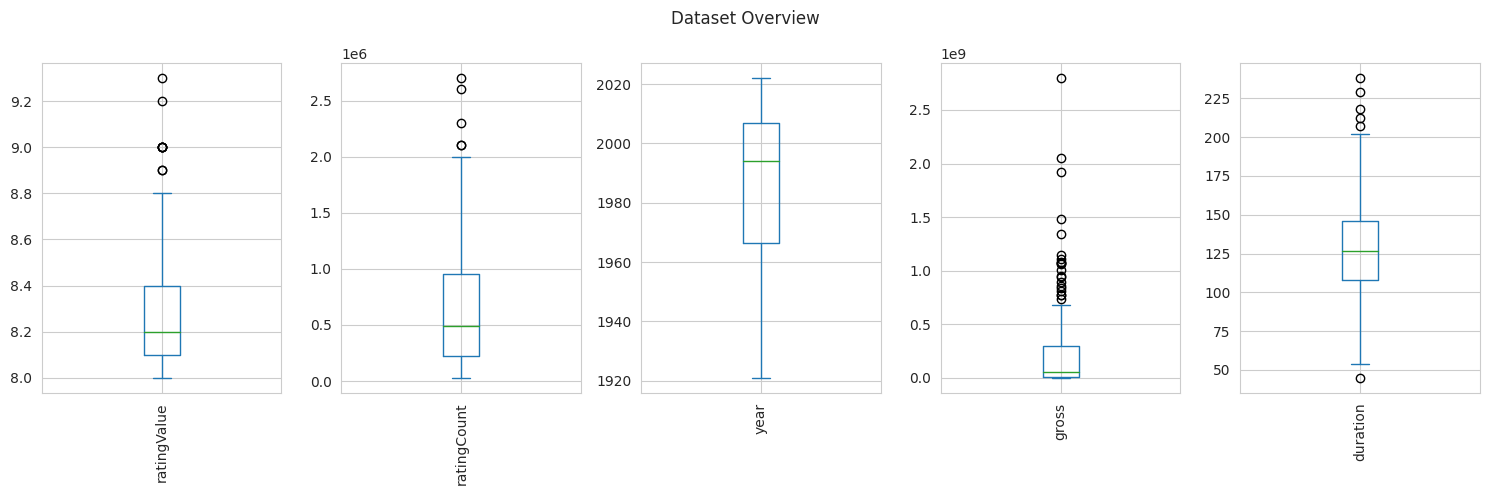

In [8]:
 _ = data.plot(
             title="Dataset Overview",
             kind="box",
             subplots=True,
             figsize=(15,5),
             rot = 90
)
plt.tight_layout()

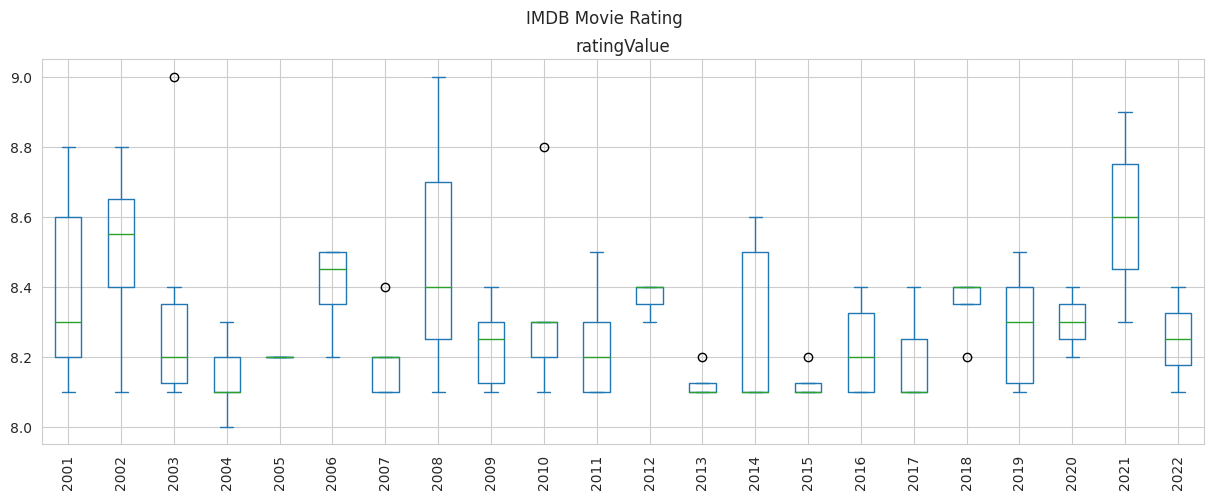

In [9]:
 _ = data[data.year>2000] \
        .plot(by="year", column = ["ratingValue"],
             title="IMDB Movie Rating",
             kind="box",
             figsize=(15,5),
             rot = 90)

### Seaborn

Documentation: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)

General approach:
- Seaborn is a Python data visualization library based on matplotlib
- It provides a high-level interface for drawing statistical graphics
- Uses the index as x-axis

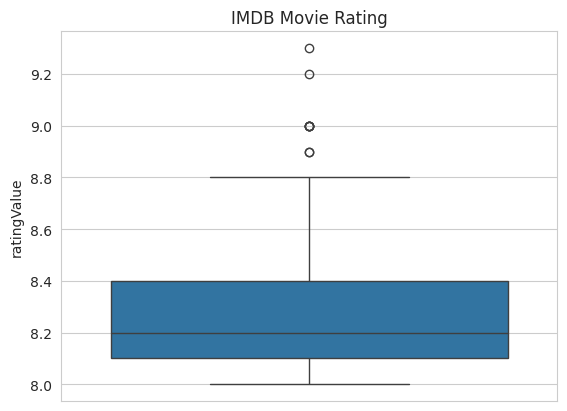

In [10]:
fig, ax = plt.subplots()
sns.boxplot(y="ratingValue", data=data, ax = ax)
ax.set_title("IMDB Movie Rating")
plt.show()

<span style="color: red">**Best Practices:** Use Seaborn for plotting and customize figures via matplotlib (OO) functions</span>

**Setting figure sizes**

- Setting the Figure size in inches
- Make sure the labels fit inside the figure using tight_layout

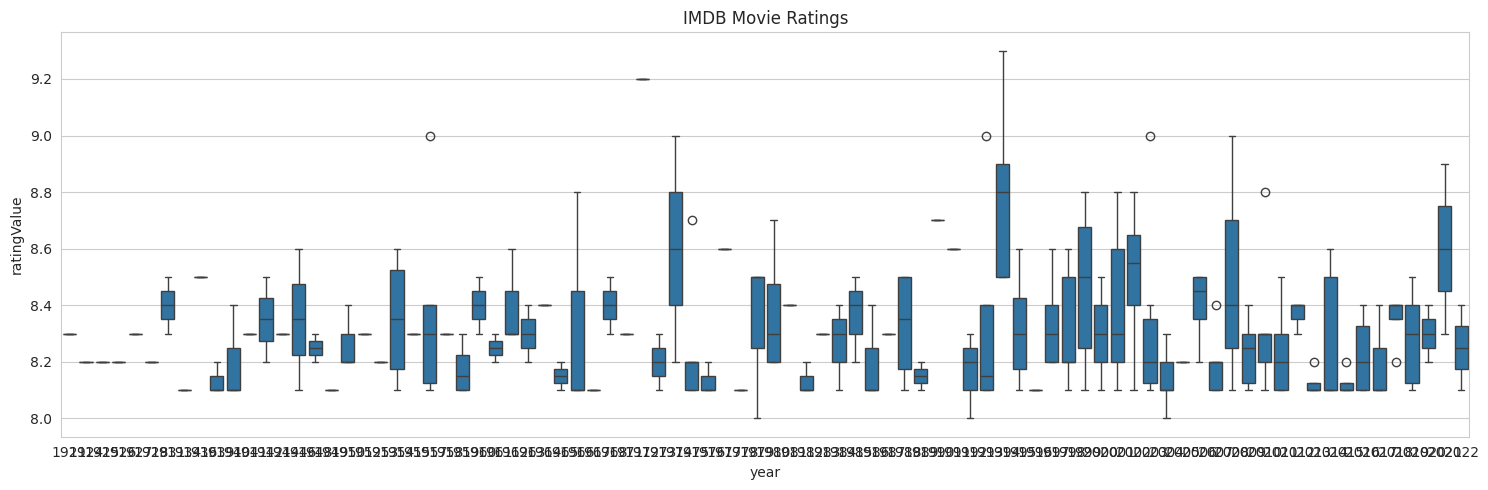

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(ax = ax, data=data, x="year", y="ratingValue")
ax.set_title("IMDB Movie Ratings")

# Make sure the labels fit inside the figure
plt.tight_layout()

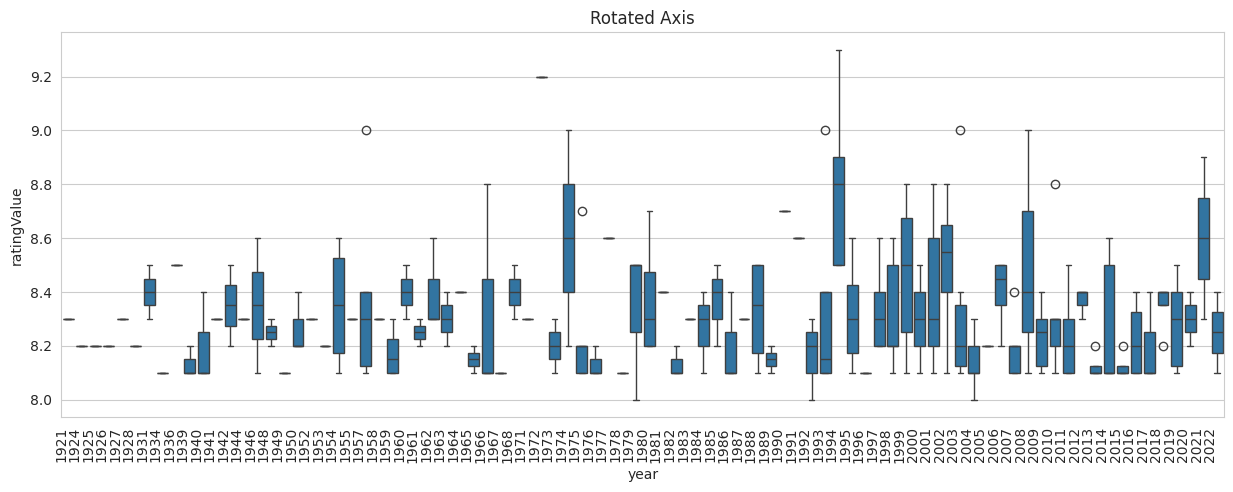

In [12]:
# ... rotating the x-ticks
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(ax = ax, data=data, x="year", y="ratingValue")
ax.set_title("Rotated Axis")
plt.xticks(rotation=90, ha="right");

**Formatting Axes**

- With the methods set_xlabel and set_ylabel, we can set the labels of the  X and Y axes
- With the method set_title, we may set the title of an axes

/tmp/ipykernel_161101/4077469814.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


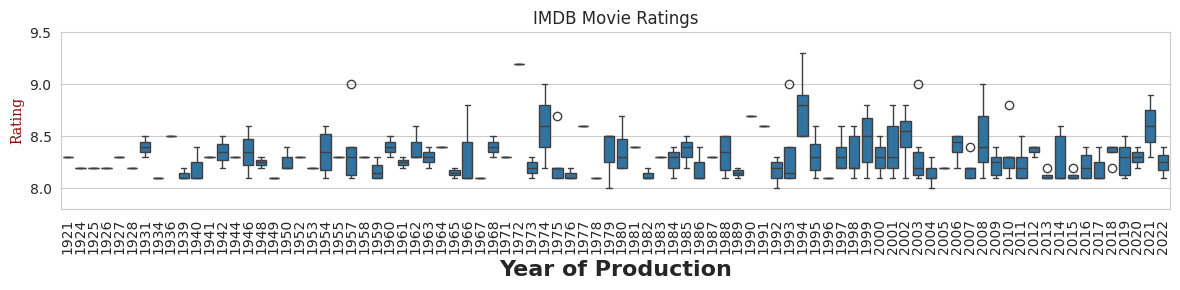

In [14]:
fig, ax = plt.subplots(figsize=(12,3))
sns.boxplot(ax = ax, data=data, x="year", y="ratingValue")
ax.set_title("IMDB Movie Ratings", )

ax.set_xlabel("Year of Production", fontdict=dict(weight="bold",fontsize=16))
ax.set_ylabel("Rating", fontdict=dict(family="serif", color="darkred"))
ax.set_ylim([7.8, 9.5])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Make sure the labels fit inside the figure
plt.tight_layout()

**Creating Subplots**

- We may plot multiple figures into the same plot using plt.subplot
- The call to subplots return a NumPy array
- We can then access each subplot by its index

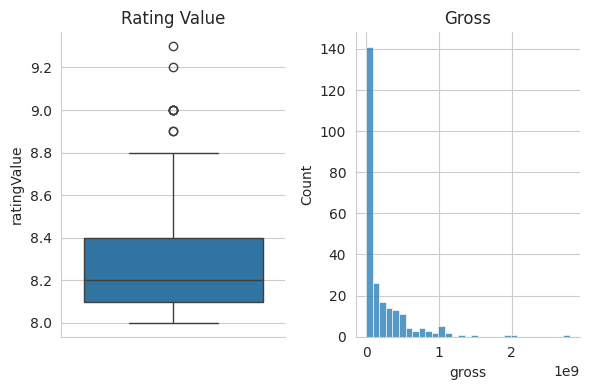

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(6, 4))

sns.boxplot(data=data, y="ratingValue", ax=ax[0])
ax[0].set_title("Rating Value")
sns.despine() # Removes spines

sns.histplot(data=data, x="gross", ax=ax[1])
ax[1].set_title("Gross")
sns.despine()

plt.tight_layout()

### Seaborn Plot Types

Seaborn divides its plotting functionality into:

![alt text](img/seaborn_plots.png "Title")


#### Catplot

This category provides access to plots that show the relationship between a numerical and one or more categorical variables. The `kind` parameter selects the underlying plot to use:

Categorical scatterplots:

- `stripplot()` (with `kind="strip"`; the default)
- `swarmplot()` (with `king="swarm"`)

Categorical distribution plots:

- `boxplot()` (with `kind="box"`)
- `violinplot()` (with `kind="violin"`)
- `boxenplot()` (with `kind="boxen"`)

Categorical estimate plots:

- `pointplot()` (with `kind="point"`)
- `barplot()` (with `kind="bar"`)
- `countplot()` (with `kind="count"`)

<a href="https://seaborn.pydata.org/generated/seaborn.catplot.html">Catplot Documentation</a>

**Examples**

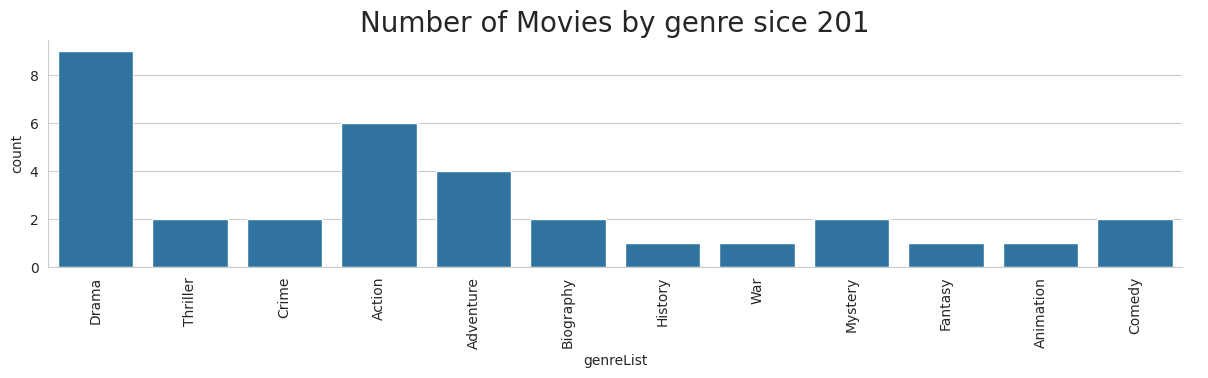

In [31]:
 # First filter some data
df = data.explode("genreList") # creates one row per genre of a movie
df = df[df.year > 2018]

# Plot some data
# returns a FacetGrid
g = sns.catplot(x="genreList",
                kind="count",
                height=3,
                aspect=4.0,
                data=df)

g.set_xticklabels(rotation=90)
_ = plt.title("Number of Movies by genre sice 201", size=20)

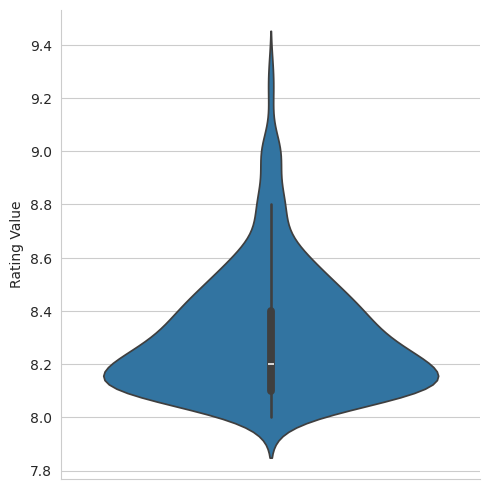

In [37]:
# Creating a violin plot
g = sns.catplot(data["ratingValue"], kind="violin")
_ = g.set_ylabels("Rating Value")

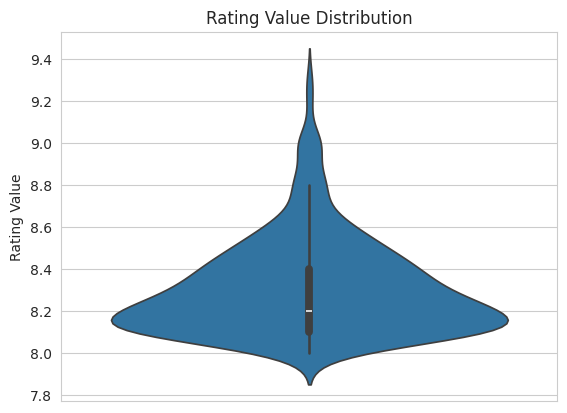

In [39]:
# For each type of plot there is also a distinct function
ax = sns.violinplot(data["ratingValue"])
_ = ax.set_ylabel("Rating Value")
_ = ax.set_title("Rating Value Distribution")

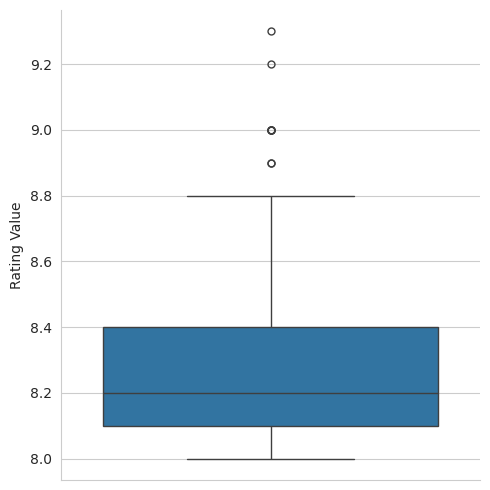

In [43]:
# Creating a violin plot
g = sns.catplot(data["ratingValue"], kind="box")
_ = g.set_ylabels("Rating Value")
_ = g.set_titles("Rating Distribution")

**Group by year**

Most plots in Seaborn provide `hue`-argument to group by a different column.

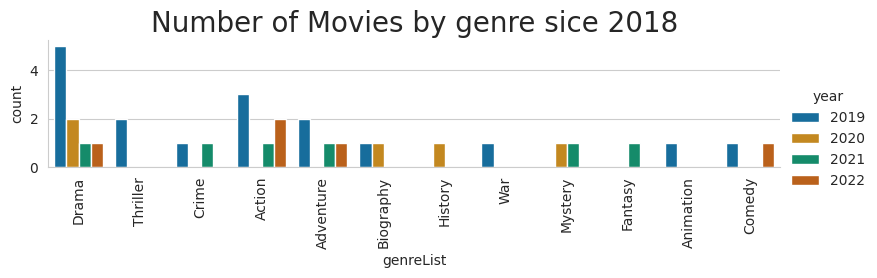

In [47]:
# First filter some data
df = data.explode("genreList")
df = df[df.year > 2018]

# Plot some data
g = sns.catplot(x="genreList",
                kind="count",
                height=2,
                aspect=4.0,
                palette="colorblind", # see https://seaborn.pydata.org/tutorial/color_palettes.html
                hue="year",
                data=df)

g.set_xticklabels(rotation=90)
plt.title("Number of Movies by genre sice 2018", size=20)
plt.show()

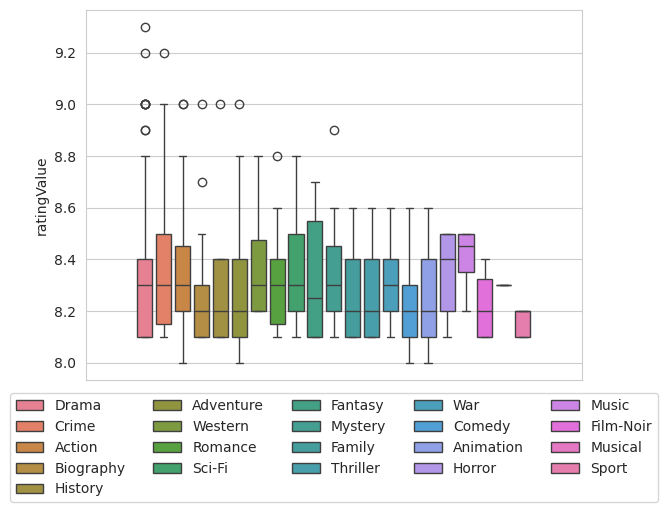

In [74]:
df = data.explode("genreList")

ax = sns.boxplot(
    df,
    y="ratingValue",
    hue="genreList",
    gap=0.2 # space between boxes
)

# Move legend to the lower center
legend = ax.legend(loc="lower center", ncols=5, bbox_to_anchor=(0.5, -0.35))

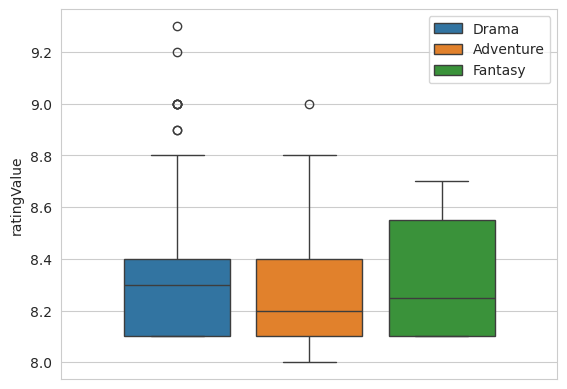

In [80]:
df = data.explode("genreList")
df = df[df["genreList"].isin(["Drama", "Adventure", "Fantasy"])]

ax = sns.boxplot(
    df,
    y="ratingValue",
    hue="genreList",
    gap=0.2 # space between boxes
)

ax.legend(loc="upper right")

#### Relplot

This category provides access to plots that show the relationship between two variables. The `kind`-parameter selects the underlying axes-level function to use:

- `scatterplot()` (with kind="scatter"; the default)
- `lineplot()` (with kind="line")

<a href="https://seaborn.pydata.org/generated/seaborn.relplot.html">Relplot Documentation</a>

**Examples**

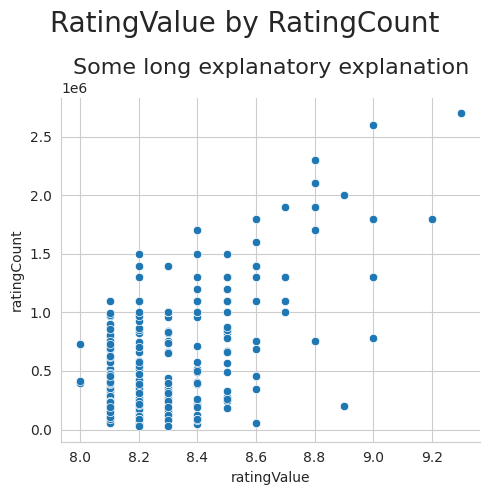

In [87]:
# Plot data
_ = sns.relplot(x="ratingValue",
                y="ratingCount",
                kind="scatter",
                data=data)

plt.suptitle("RatingValue by RatingCount", size=20)
plt.title("Some long explanatory explanation", size=16)
plt.tight_layout()

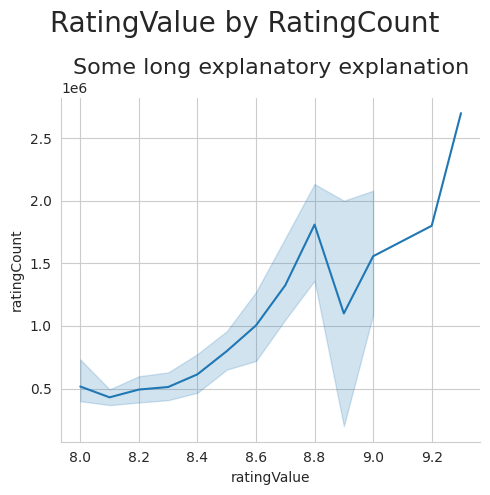

In [89]:
# Plot data
_ = sns.relplot(x="ratingValue",
                y="ratingCount",
                kind="line",
                data=data)

plt.suptitle("RatingValue by RatingCount", size=20)
plt.title("Some long explanatory explanation", size=16)
plt.tight_layout()

**Group by year**

We may use different parameters to group by year: `style`, `hue` or `size`.

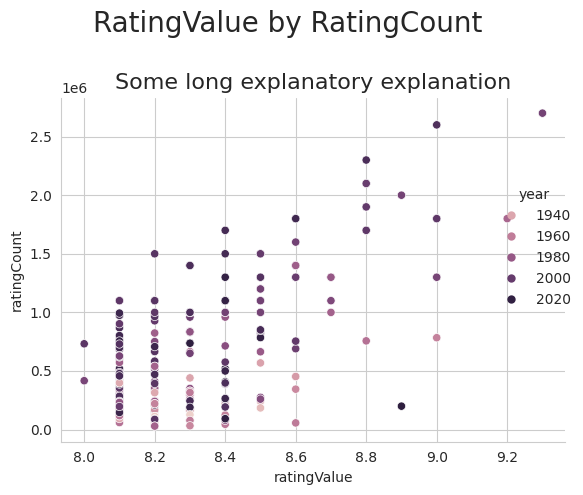

In [93]:
# Plot data
_ = sns.relplot(x="ratingValue",
                y="ratingCount",
                kind="scatter",
                hue="year",
                data=df)

plt.suptitle("RatingValue by RatingCount", size=20)
plt.title("Some long explanatory explanation", size=16)
plt.tight_layout()
plt.show()

#### lmplot

`lmplot` plots the data and a linear regression model.

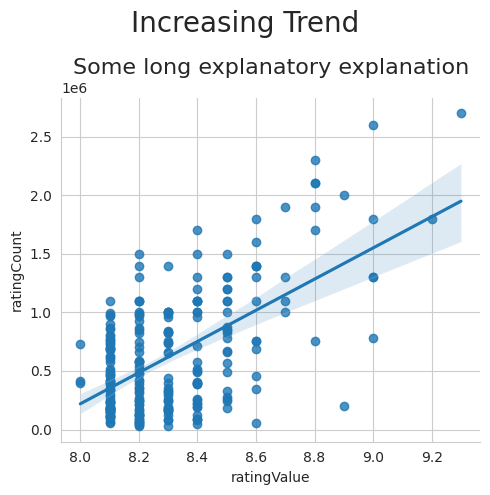

In [95]:
_ = sns.lmplot(x="ratingValue", y="ratingCount", data=data, ci=95)

plt.suptitle("Increasing Trend", size=20)
plt.title("Some long explanatory explanation", size=16)
plt.tight_layout()

This category provides access to several approaches for visualizing the univariate or bivariate distribution of data. The kind parameter selects the approach to use:

- `histplot()` (with kind="hist"; the default)
- `kdeplot()` (with kind="kde")
- `ecdfplot()` (with kind="ecdf"; univariate-only)

**Example**

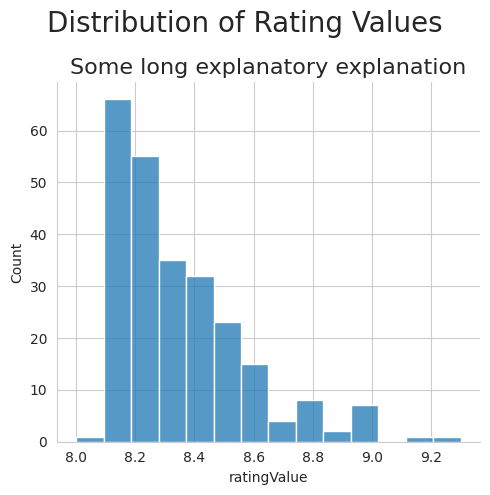

In [96]:
df = data.explode("genreList").reset_index()
df = df[df.genreList.isin(["Romance", "Drama", "Action"])]

# Plot data
_ = sns.displot(x="ratingValue", kind="hist", data=df)

plt.suptitle("Distribution of Rating Values", size=20)
plt.title("Some long explanatory explanation", size=16)
plt.tight_layout()

**Grouping and stacking**

We may group by genreList and show proportion of each genre to the total count.

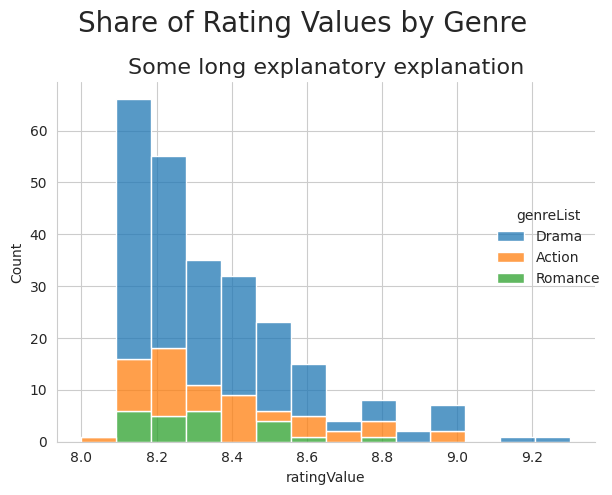

In [98]:
df = data.explode("genreList").reset_index()
df = df[df.genreList.isin(["Romance", "Drama", "Action"])]

# Plot data
_ = sns.displot(x="ratingValue",
                kind="hist",
                hue="genreList",
                multiple="stack",
                data=df)

plt.suptitle("Share of Rating Values by Genre", size=20)
plt.title("Some long explanatory explanation", size=16)
plt.tight_layout()

**Spit genres to multiple subplots**

The most useful feature offered by the figure-level functions is that they can easily create figures with multiple subplots using `col` parameter.

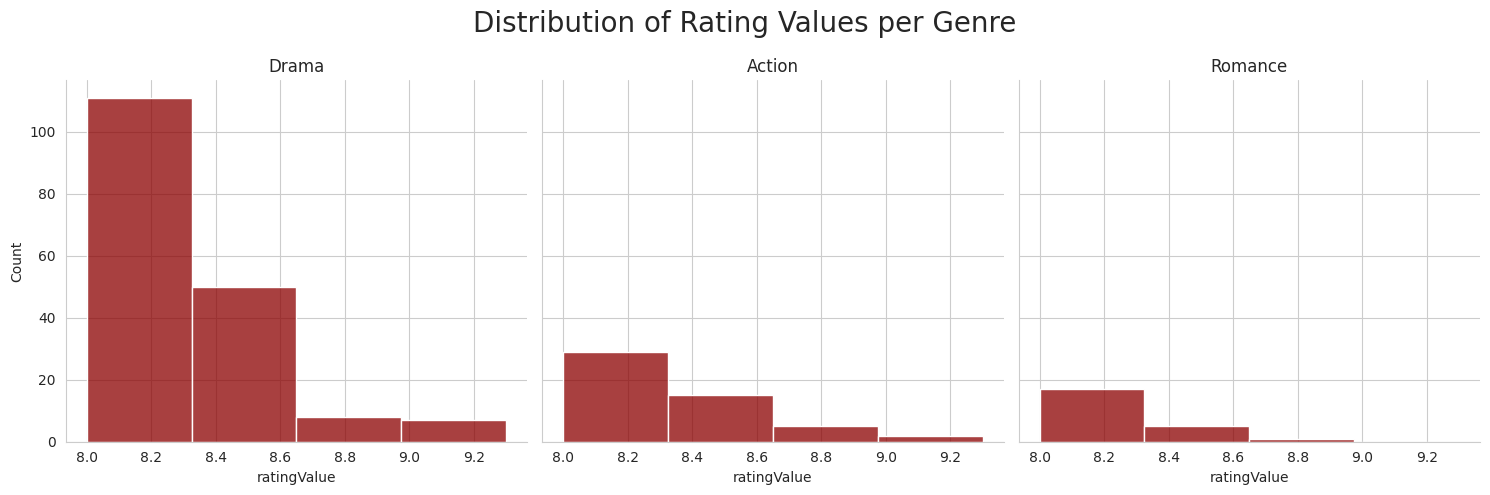

In [110]:
df = data.explode("genreList").reset_index()
df = df[df.genreList.isin(["Romance", "Drama", "Action"])]

# Plot data
fg = sns.displot(x="ratingValue", kind="hist", col="genreList", color="darkred", data=df, bins=4)

fg.axes_dict["Romance"].set_title("Romance")
fg.axes_dict["Drama"].set_title("Drama")
fg.axes_dict["Action"].set_title("Action")

plt.suptitle("Distribution of Rating Values per Genre", size=20)
plt.tight_layout()

**hue and col parameters**

Another useful feature is the `hue` parameter to group by genreList.

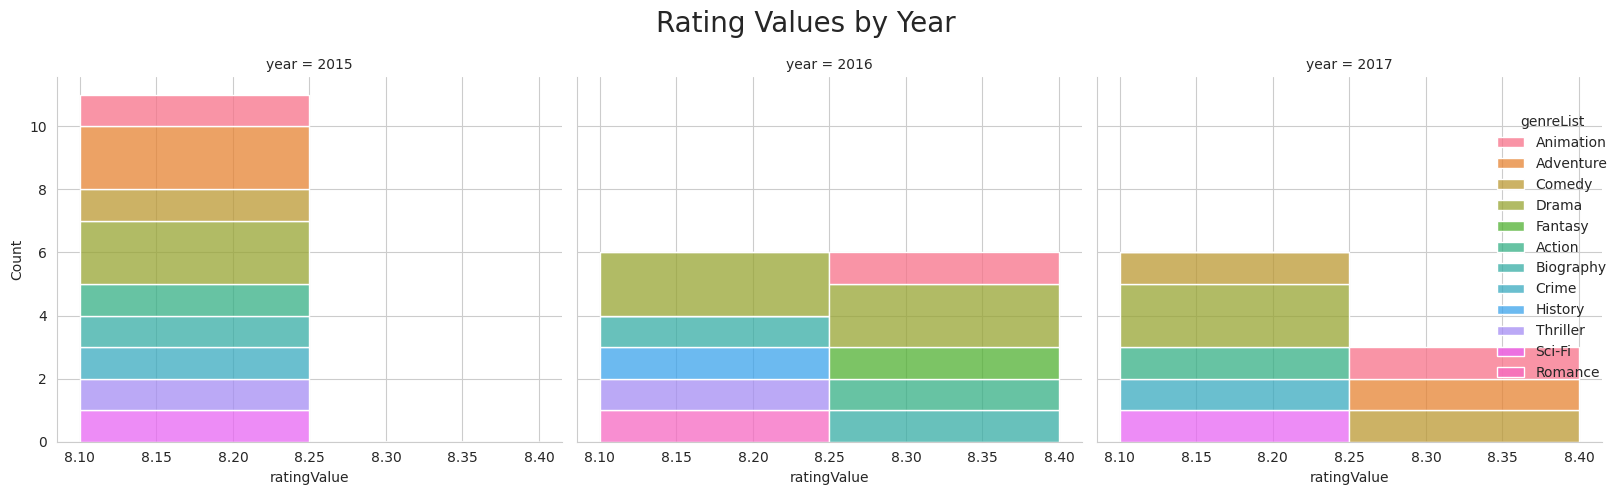

In [100]:
df = data.explode("genreList").reset_index()
df = df[(df.year >= 2015) & (df.year <= 2017)]

# Plot data
g = sns.displot(x="ratingValue",
                kind="hist",
                col="year",
                bins=2,
                multiple="stack",
                hue="genreList",
                data=df)

plt.suptitle("Rating Values by Year", size=20)
plt.tight_layout()
plt.show()

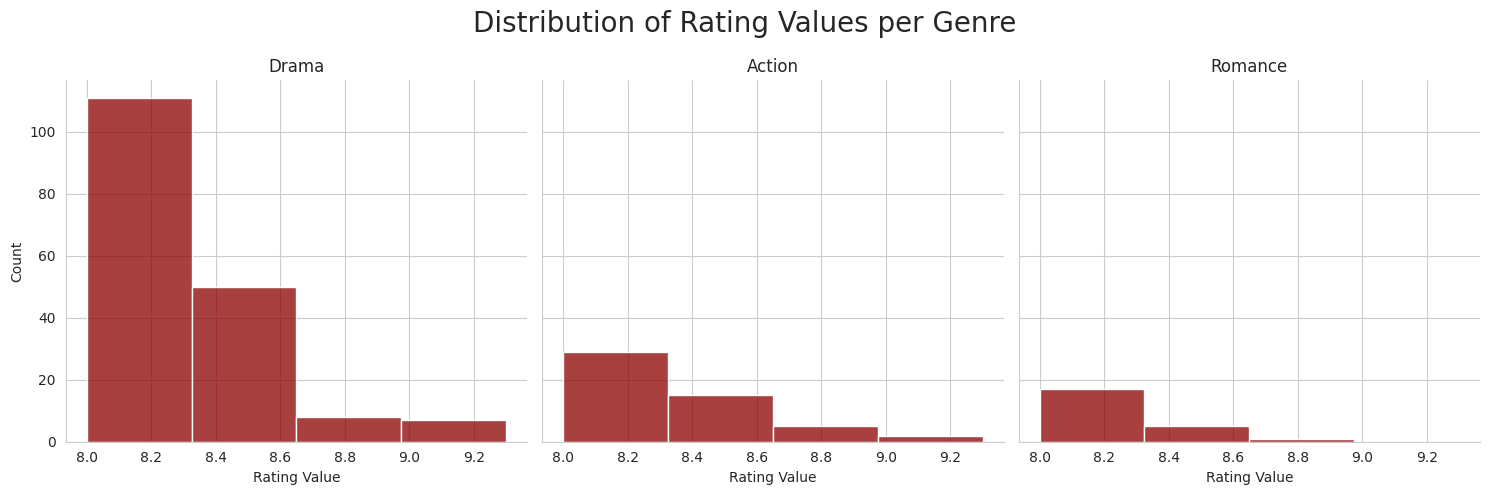

In [117]:
df = data.explode("genreList").reset_index()
df = df[df.genreList.isin(["Romance", "Drama", "Action"])]

# Plot data
fg = sns.displot(x="ratingValue", kind="hist", col="genreList", color="darkred", data=df, bins=4)
fg.set_xlabels("Rating Value")

fg.axes_dict["Romance"].set_title("Romance")
fg.axes_dict["Drama"].set_title("Drama")
fg.axes_dict["Action"].set_title("Action")

plt.suptitle("Distribution of Rating Values per Genre", size=20)
plt.tight_layout()

fg.savefig("plot.svg")
fg.savefig("plot.pdf")

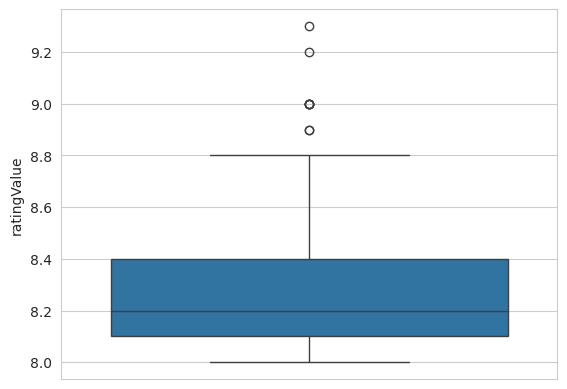

In [116]:
# Saving a matplot figure
ax = sns.boxplot(data, y="ratingValue")
fig = ax.get_figure()
fig.savefig("boxplot.svg")

#### Best practices

- Select a subset of rows to use using pandas,
- Choose the *right* plot,
- Use `col`, `row`, `hue`, `style` or `size` parameters to apply groupings.

In [ ]:
# First filter some data
df = data.explode("genreList")
df = df[df.year > 2018]

# Plot some data
# returns a FacetGrid
g = sns.catplot(x='genreList',
                kind='count',
                height=3,
                aspect=4.0,
                palette="Blues_r",
                # order data
                order = df['genreList'].value_counts().index,
                data=df)

# rotate labels
g.set_xticklabels(rotation=90)

# add title
g.fig.text(0.05, 1.2, 'Movies by Genre',
         fontsize=22, fontweight='bold', fontfamily='serif')
g.fig.text(0.05, 1.05, 'Most Movies are in the drama genre',
         fontsize=20, fontweight='light', fontfamily='serif');

# annotate plot
g.ax.annotate('Most popular genre', xy=(0, 9), xytext=(2, 5.5),
             arrowprops=dict(color='red',arrowstyle="->", connectionstyle="arc3,rad=.3"),
             fontsize=14,fontfamily='monospace', ha='left');
sns.despine()